# Python Outlier Detection (PyOD) Toolkit - iris

PyOD is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data.

Learning Objectives:
* Understand Python 
* PyOD
* Combination Methods
* Read [this article](https://towardsdatascience.com/anomaly-detection-with-pyod-b523fc47db9)

* You can find the Python PyOD Api [here](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example).

* You can find all the algorithms of PyOD [here](https://pyod.readthedocs.io/en/latest/) and [here](https://pyod.readthedocs.io/en/latest/pyod.html).

Assignment:
* Please select two algorithms to apply to your dataset.
* Your analysis should provide a clear description for each of the algorithm and the results.
* Your work should perform the combination methods.
* Justify your identification for the anomalies with the data attributes.

## Data
* We use the iris dataset
* In your assignment, split your dataset to be X_train and X_test. Then you can follow accordingly.

In [170]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
#from pyod.utils.data import generate_data
#from pyod.utils.data import evaluate_print
#from pyod.utils.example import visualize

In [171]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df.columns = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']
#X = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
#y = df['Species']

X = df.loc[:,0:3]
y = df.loc[:,4]

#### Standardize
When you do unsupervised learning, it is always a safe step to standardize the predictors

In [172]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Train, test

In [173]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [174]:
X_train.shape

(100, 4)

In [175]:
X_train.head()

,0,1,2,3
96,-0.173674,-0.356361,0.250967,0.133226
105,2.128516,-0.124958,1.615744,1.185010
66,-0.294842,-0.124958,0.421564,0.396172
0,-0.900681,1.032057,-1.341272,-1.312977
122,2.249683,-0.587764,1.672610,1.053537


In [176]:
X_test.head()

,0,1,2,3
73,0.310998,-0.587764,0.535296,0.001753
18,-0.173674,1.726266,-1.170675,-1.181504
118,2.249683,-1.050569,1.786341,1.447956
78,0.189830,-0.356361,0.421564,0.396172
76,1.159173,-0.587764,0.592162,0.264699


#### Plot in a 2-D space just to visualize it.

In [177]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [178]:
y_color = np.where(y=='Iris-setosa','red',
            np.where(y=='Iris-versicolor','blue','green'))

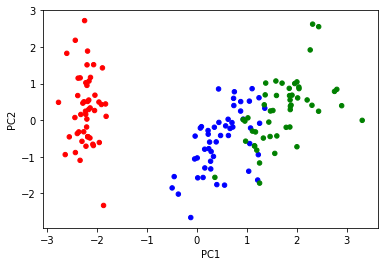

In [179]:
x_pca.plot(kind='scatter', x='PC1', y='PC2',c=y_color)

## KNN: An Unsupervised technique
* You do not need the target variable to train the unsupervised learning model.

In [180]:
# train kNN detector
# Use 3-nearest neighbors
clf_name = 'KNN'
clf = KNN(n_neighbors=3, method='largest')
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2,
  radius=1.0)

* After modeling, there is an anomaly score for each observation in the training dataset X_Train.

In [181]:
y_train_scores = clf.decision_scores_
y_train_scores[1:10]

array([0.60856541, 0.40154483, 0.23828773, 0.6397919 , 0.46639747,
       0.26120679, 0.28942582, 0.44566472, 1.04181394])

#### Learn how to produce outlier scores
* With the trained k-NN model, you can apply to the test dataset to predict outliers. The function “decision_functions()” generates the anomaly score based on your model predictions.
* How is the “anomaly score” defined? Recall the k-NN model uses the Euclidean distance to measure the distance. An outlier is a point that is distant from neighboring points, so the outlier score is defined by the distance value. Each point will have an outlier score. Our job is to find those points with high outlier scores. We can use a histogram to find those points.
* "decision_functions()" predicts the outliers of a dataframe. A higher score means more abnormal. 
* The histogram below shows there are outliers. If we choose 1.0 to be the cutpoint, we can suggest those >=1.0 to be outliers

In [182]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_pred = pd.Series(y_test_pred)
y_test_pred.value_counts()

0    43
1     7
dtype: int64

In [183]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0    0.419210
1    0.571838
2    0.984725
3    0.311981
4    0.621757
dtype: float64

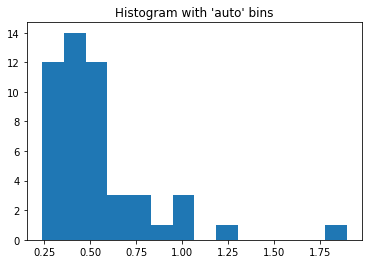

In [184]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

* We will identify the outliers as a cluster and demonstrate the X attributes
* A high anomaly score means more abnormal. The histogram below shows there are outliers. If we choose 1.0 to be the cut point, we can suggest those >=1 to be outliers

In [185]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<1, 0, 1)
X_test_cluster['cluster'].value_counts()

1    32
0    18
Name: cluster, dtype: int64

In [186]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,distance
cluster,,,,,
0,-0.954534,1.070624,-1.309680,-1.269152,0.498702
1,0.644209,-0.255122,0.633034,0.634467,1.218094


* We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are four methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)
* (3) Average of Maximum (AOM)
* (4) Maximum of Average (MOA)

### Maximum of maximum
Merge the outlier scores from multiple estimators by taking the maximum.

In [188]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [189]:
n_clf = 10  # number of base detectors
k_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

* KNN() is sensitive to the number of neighbors initially assigned in the model. 
* So we can test a range of n_neighbors from 10 to 200.
* We will first create a zero matrix to store the output of the 20 models

In [190]:
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

In [191]:
train_scores.shape

(100, 10)

In [192]:
train_scores.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
for i in range(n_clf):
        k = k_list[i]

        clf = KNN(n_neighbors=k, method='largest')
        clf.fit(X_train)

        train_scores.loc[:, i] = clf.decision_scores_
        test_scores.loc[:, i] = clf.decision_function(X_test) # Predict raw anomaly score of X using the fitted detector.

In [194]:
train_scores.shape

(100, 10)

In [195]:
train_scores[1:10]

,0,1,2,3,4,5,6,7,8,9
1,0.724909,1.153648,1.524246,1.735996,1.976466,2.227508,2.318769,2.419544,2.735667,2.938644
2,0.446488,0.671423,0.855110,1.012186,1.186017,1.277639,1.380243,1.570675,1.749227,1.849038
3,0.267325,0.535316,0.713822,0.967472,1.435729,2.476078,2.753663,2.819901,2.933807,3.066992
4,0.983347,1.508416,1.748122,1.887418,2.130700,2.323992,2.422399,2.530705,2.724746,2.984229
5,0.532847,0.785873,0.954584,1.071304,1.158514,1.296244,1.415394,1.547349,1.808956,2.132808
6,0.296361,0.561916,0.764503,0.963545,1.341498,2.342550,2.572155,2.670945,2.785765,2.922065
7,0.364407,0.540081,0.736883,0.976481,1.372774,2.476078,2.732915,2.786260,2.946305,3.085707
8,0.761613,0.996152,1.114292,1.532372,1.881477,2.599862,2.858109,3.063659,3.173207,3.326539
9,1.204779,1.626993,1.838647,2.210389,2.406527,2.576581,2.682151,2.792679,2.924831,3.031087


### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.
See [PyOD API Reference](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn).

In [197]:
# Combination by average
y_by_average = average(test_scores)
y_by_average[1:10]

array([2.16033817, 2.32736817, 1.00062504, 1.25714829, 1.62619912,
       1.25386109, 1.37692698, 1.64981836, 1.13272913])

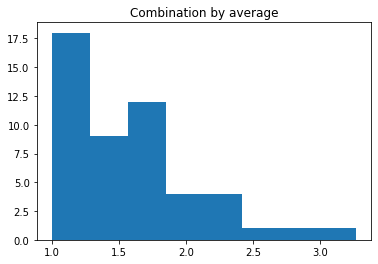

In [198]:
# Combination by average
y_by_average = average(test_scores)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

It appears we can identify those >=2.5 as the outliers

In [213]:
# We don't want to overwrite X_test, so we use .copy() to make a new copy of X_test. 
# If you use df_test = X_test, you reference to the same data.
df_test = X_test.copy()
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<2.5, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    47
1     3
Name: y_by_average_cluster, dtype: int64

#### Describe the outliers

In [214]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,y_by_average_score
y_by_average_cluster,,,,,
0,0.040303,0.081828,-0.04788,-0.023423,1.501459
1,0.512944,2.420475,-0.35560,-0.480315,2.946089


### Maximum of maximum
Merge the outlier scores from multiple estimators by taking the maximum.

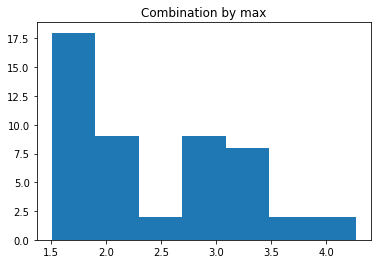

In [215]:
# Combination by max
y_by_maximization = maximization(test_scores)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Similarly, it appears we can identify those >=3.5 as the outliers

In [216]:
df_test = X_test.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<3.5, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    46
1     4
Name: y_by_maximization_cluster, dtype: int64

#### Describe the outliers

In [217]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,y_by_maximization_score
y_by_maximization_cluster,,,,,
0,0.052857,0.041049,-0.018527,-0.001105,2.323315
1,0.250414,2.304774,-0.616235,-0.622744,3.895244


### Average of Maximum

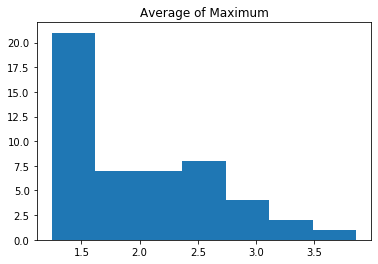

In [218]:
# Combination by aom
y_by_aom = aom(test_scores, n_buckets=5)
             
import matplotlib.pyplot as plt
plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

Similarly, it appears we can identify those >=3.0 as the outliers

In [219]:
df_test = X_test.copy()
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<3.0, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    46
1     4
Name: y_by_aom_cluster, dtype: int64

#### Describe the outliers

In [220]:
df_test.groupby('y_by_aom_cluster').mean()

,0,1,2,3,y_by_aom_score
y_by_aom_cluster,,,,,
0,0.052857,0.041049,-0.018527,-0.001105,1.904915
1,0.250414,2.304774,-0.616235,-0.622744,3.417981


### Maximum of Average (MOA)

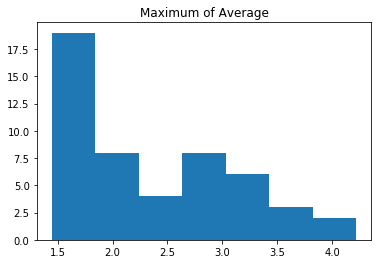

In [221]:
# Combination by moa
y_by_moa = moa(test_scores, n_buckets=5)

import matplotlib.pyplot as plt
plt.hist(y_by_moa, bins='auto')  # arguments are passed to np.histogram
plt.title("Maximum of Average")
plt.show()

Similarly, it appears we can identify those >=3 as the outliers

In [222]:
df_test = X_test.copy()
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<3, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    38
1    12
Name: y_by_moa_cluster, dtype: int64

#### Describe the outliers

In [223]:
df_test.groupby('y_by_moa_cluster').mean()

,0,1,2,3,y_by_moa_score
y_by_moa_cluster,,,,,
0,0.116491,-0.161495,0.107307,0.115927,2.038525
1,-0.082798,1.437012,-0.616235,-0.578919,3.403086
